In [1]:
#CSV読み込み
import pandas as pd
df1=pd.read_csv("tokyo_2022syazyounerai.csv")
df1.head()

,罪名,手口,管轄警察署（発生地）,管轄交番・駐在所（発生地）,市区町村コード（発生地）,都道府県（発生地）,市区町村（発生地）,町丁目（発生地）,発生年月日（始期）,発生時（始期）,発生場所,発生場所の詳細,施錠関係,現金被害の有無
0,窃盗,車上ねらい,中央,八重洲通交番,131024.0,東京都,中央区,八重洲１丁目,2022/7/9,11,道路上,その他,施錠せず,あり
1,窃盗,車上ねらい,中央,八重洲通交番,131024.0,東京都,中央区,八重洲２丁目,2022/4/3,11,道路上,その他,施錠せず,あり
2,窃盗,車上ねらい,中央,八重洲通交番,131024.0,東京都,中央区,八重洲２丁目,2022/4/3,13,駐車（輪）場,駐車（輪）場,施錠せず,なし
3,窃盗,車上ねらい,中央,八重洲通交番,131024.0,東京都,中央区,八重洲２丁目,2022/10/18,22,道路上,その他,施錠せず,あり
4,窃盗,車上ねらい,中央,日本橋交番,131024.0,東京都,中央区,日本橋２丁目,2022/1/3,14,道路上,その他,施錠せず,なし


In [2]:
#カラム削除(市区町村コード,町丁目)
df1=df1.drop(["市区町村コード（発生地）","町丁目（発生地）"],axis=1)
#年月日をdatetime型に変換
df1["発生年月日（始期）"]=pd.to_datetime(df1["発生年月日（始期）"])
df1.head()

,罪名,手口,管轄警察署（発生地）,管轄交番・駐在所（発生地）,都道府県（発生地）,市区町村（発生地）,発生年月日（始期）,発生時（始期）,発生場所,発生場所の詳細,施錠関係,現金被害の有無
0,窃盗,車上ねらい,中央,八重洲通交番,東京都,中央区,2022-07-09,11,道路上,その他,施錠せず,あり
1,窃盗,車上ねらい,中央,八重洲通交番,東京都,中央区,2022-04-03,11,道路上,その他,施錠せず,あり
2,窃盗,車上ねらい,中央,八重洲通交番,東京都,中央区,2022-04-03,13,駐車（輪）場,駐車（輪）場,施錠せず,なし
3,窃盗,車上ねらい,中央,八重洲通交番,東京都,中央区,2022-10-18,22,道路上,その他,施錠せず,あり
4,窃盗,車上ねらい,中央,日本橋交番,東京都,中央区,2022-01-03,14,道路上,その他,施錠せず,なし


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1668 entries, 0 to 1667
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   罪名             1668 non-null   object        
 1   手口             1668 non-null   object        
 2   管轄警察署（発生地）     1668 non-null   object        
 3   管轄交番・駐在所（発生地）  1666 non-null   object        
 4   都道府県（発生地）      1667 non-null   object        
 5   市区町村（発生地）      1667 non-null   object        
 6   発生年月日（始期）      1668 non-null   datetime64[ns]
 7   発生時（始期）        1668 non-null   object        
 8   発生場所           1668 non-null   object        
 9   発生場所の詳細        1668 non-null   object        
 10  施錠関係           1668 non-null   object        
 11  現金被害の有無        1668 non-null   object        
dtypes: datetime64[ns](1), object(11)
memory usage: 156.5+ KB


In [4]:
#欠損値確認
print(df1.isnull().sum())
#欠損値抽出
dfnull=df1[df1.isnull().any(axis=1)]
display(dfnull)

罪名               0
手口               0
管轄警察署（発生地）       0
管轄交番・駐在所（発生地）    2
都道府県（発生地）        1
市区町村（発生地）        1
発生年月日（始期）        0
発生時（始期）          0
発生場所             0
発生場所の詳細          0
施錠関係             0
現金被害の有無          0
dtype: int64


,罪名,手口,管轄警察署（発生地）,管轄交番・駐在所（発生地）,都道府県（発生地）,市区町村（発生地）,発生年月日（始期）,発生時（始期）,発生場所,発生場所の詳細,施錠関係,現金被害の有無
210,窃盗,車上ねらい,大森,NaN,東京都,大田区,2022-04-09,15,駐車（輪）場,駐車（輪）場,施錠した,あり
886,窃盗,車上ねらい,荒川,NaN,NaN,NaN,2022-10-29,16,道路上,その他,施錠せず,あり


In [5]:
#欠損値削除
df1=df1.dropna()
df1

,罪名,手口,管轄警察署（発生地）,管轄交番・駐在所（発生地）,都道府県（発生地）,市区町村（発生地）,発生年月日（始期）,発生時（始期）,発生場所,発生場所の詳細,施錠関係,現金被害の有無
0,窃盗,車上ねらい,中央,八重洲通交番,東京都,中央区,2022-07-09,11,道路上,その他,施錠せず,あり
1,窃盗,車上ねらい,中央,八重洲通交番,東京都,中央区,2022-04-03,11,道路上,その他,施錠せず,あり
2,窃盗,車上ねらい,中央,八重洲通交番,東京都,中央区,2022-04-03,13,駐車（輪）場,駐車（輪）場,施錠せず,なし
3,窃盗,車上ねらい,中央,八重洲通交番,東京都,中央区,2022-10-18,22,道路上,その他,施錠せず,あり
4,窃盗,車上ねらい,中央,日本橋交番,東京都,中央区,2022-01-03,14,道路上,その他,施錠せず,なし
...,...,...,...,...,...,...,...,...,...,...,...,...
1663,窃盗,車上ねらい,小平,小川駅前交番,東京都,小平市,2022-01-29,17,その他,駐車（輪）場,施錠せず,なし
1664,窃盗,車上ねらい,小平,花小金井駅前交番,東京都,小平市,2022-01-23,18,一戸建住宅,その他,施錠せず,なし
1665,窃盗,車上ねらい,小平,花小金井駅前交番,東京都,小平市,2022-09-15,9,その他,駐車（輪）場,施錠せず,なし
1666,窃盗,車上ねらい,小平,花小金井駅前交番,東京都,小平市,2022-01-21,11,その他,駐車（輪）場,施錠せず,あり


In [6]:
#東京都内の各市区町村の犯罪発生件数
df_bar=df1.groupby("市区町村（発生地）").count()[["都道府県（発生地）"]]
df_bar=df_bar.sort_values("都道府県（発生地）",ascending=False)
df_bar.head()

,都道府県（発生地）
市区町村（発生地）,
大田区,153
江戸川区,143
板橋区,94
足立区,90
世田谷区,68


東京都内では大田区が最も車上荒らしの被害を受けている地域である。

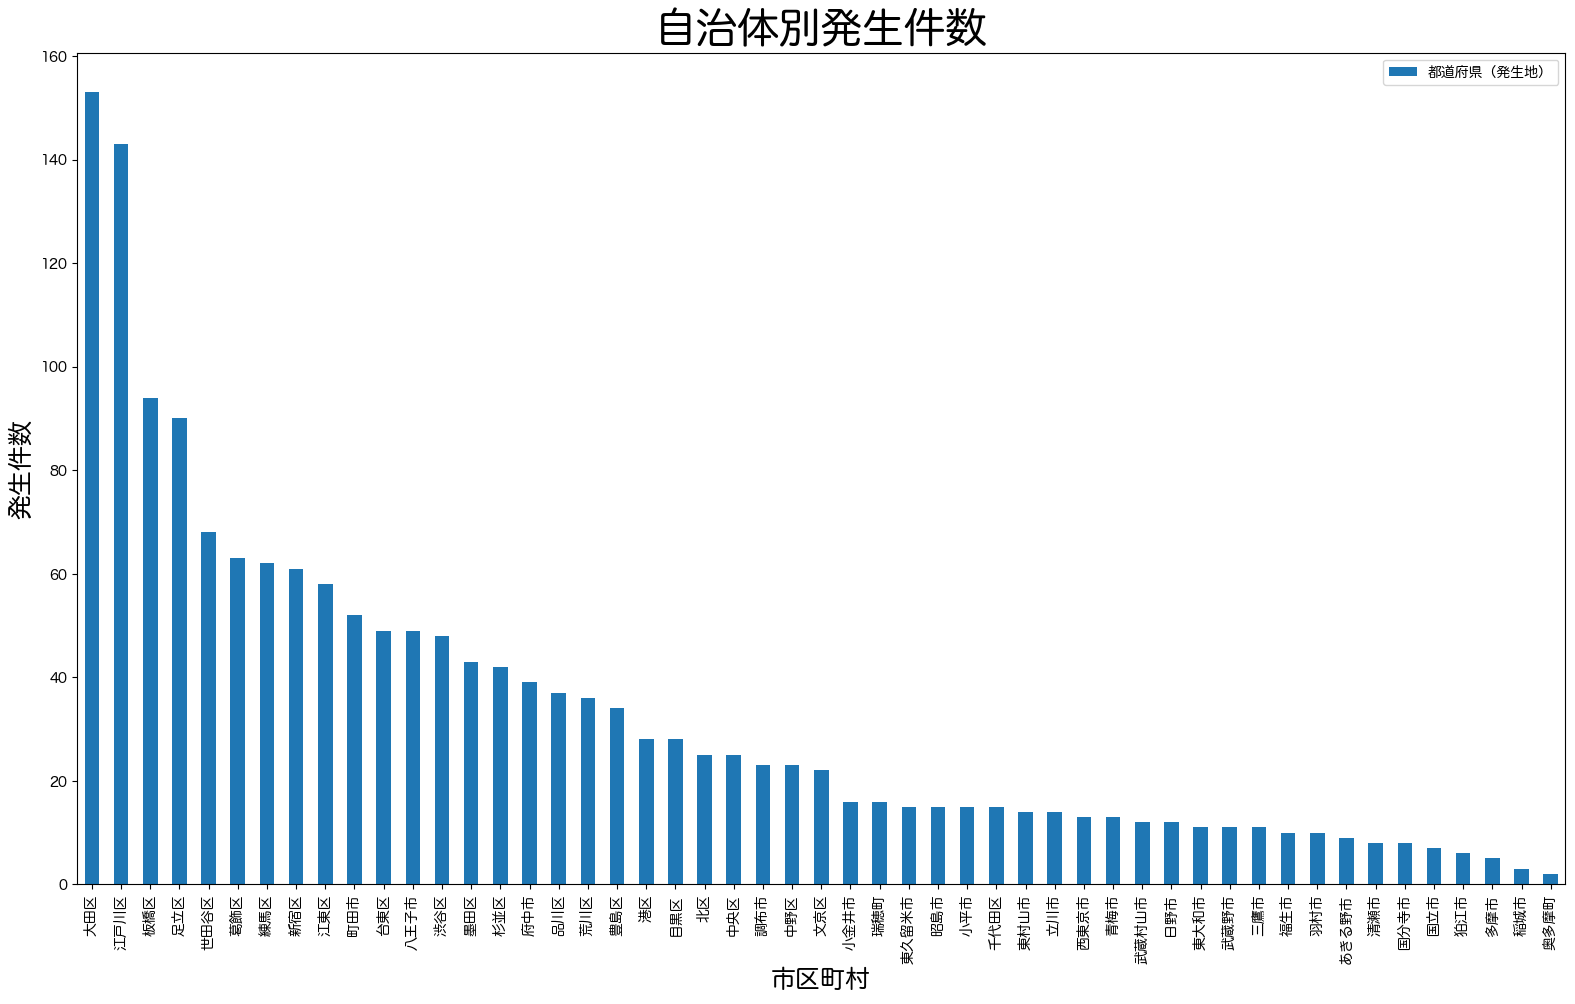

In [7]:
#グラフにプロット
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=[19.2,10.8]
plt.rcParams['font.family']= 'Hiragino Maru Gothic Pro'
df_bar.plot.bar()
plt.title("自治体別発生件数",fontsize=30)
plt.xlabel("市区町村",fontsize=18)
plt.ylabel("発生件数",fontsize=18)
plt.show()

In [8]:
#ポアソン分布
import numpy as np
from scipy.stats import skew,poisson,kurtosis

bar_mean=df_bar.mean()
x=np.arange(0,60,1)
#確率質量関数
poi=poisson.pmf(x,bar_mean)
#累積関数
cdf=poisson.cdf(x,bar_mean)
#尖度
sk=skew(poi)
#歪度
kur=kurtosis(poi)

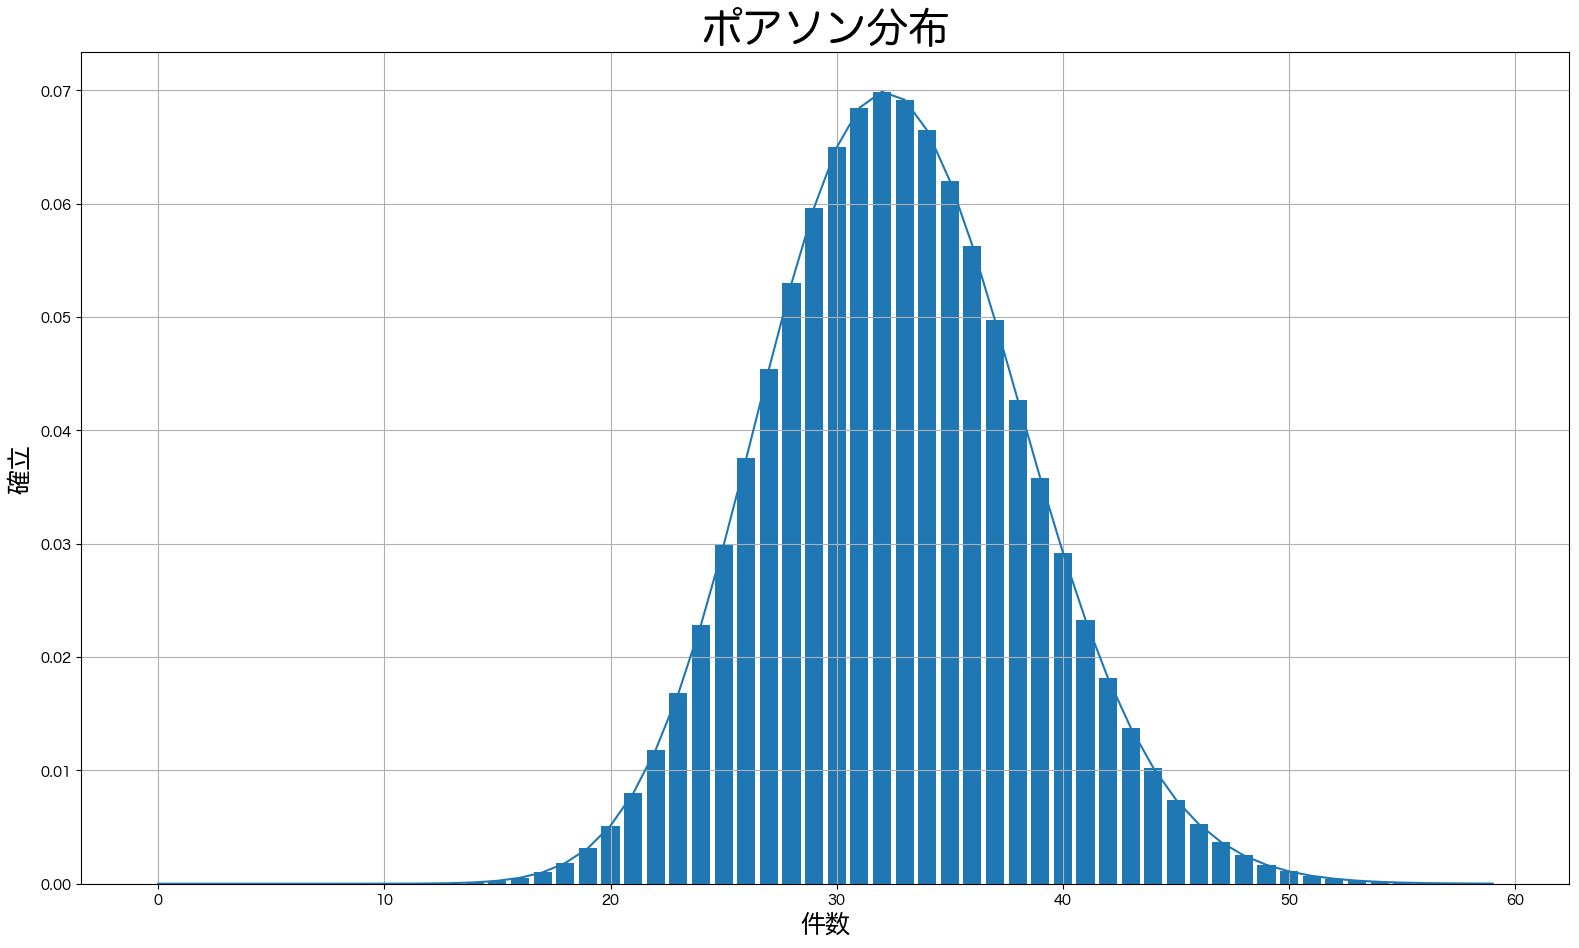

歪度: -0.14
尖度: 1.18


In [9]:
%matplotlib inline

plt.bar(x,poi)
plt.plot(x, poi)
plt.title("ポアソン分布",fontsize=30)
plt.xlabel("件数",fontsize=18)
plt.ylabel("確立",fontsize=18)
plt.grid()
plt.show()

print('歪度: {0:.2f}'.format(kur))
print('尖度: {0:.2f}'.format(sk))

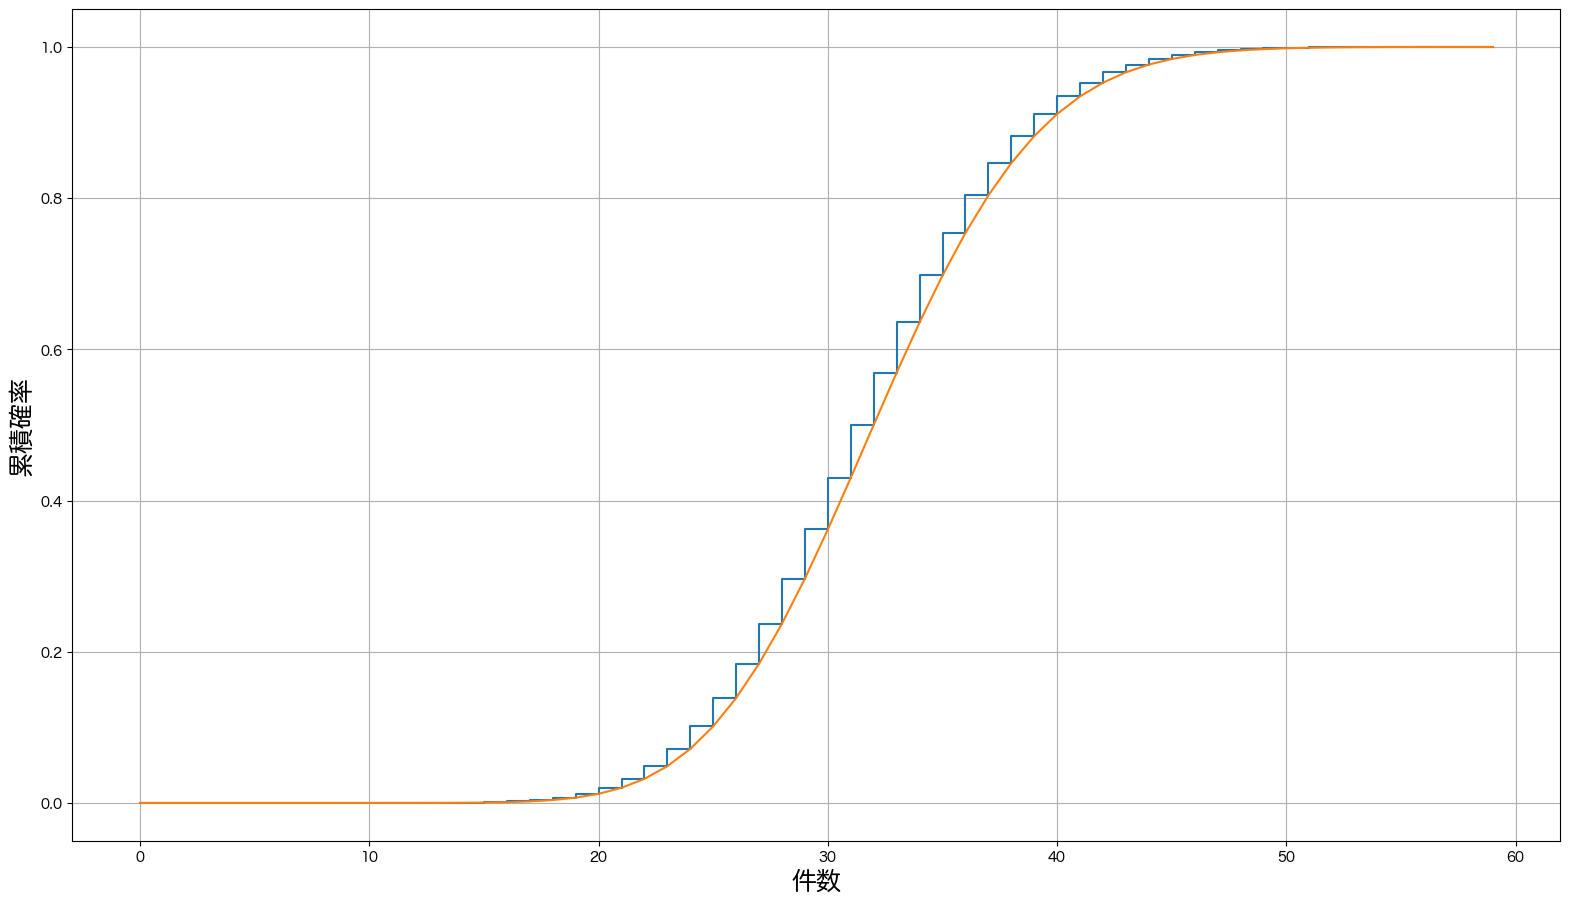

In [10]:
#累積分布関数
%matplotlib inline

plt.step(x,cdf)
plt.plot(x,cdf)
plt.xlabel("件数",fontsize=18)
plt.ylabel("累積確率",fontsize=18)
plt.grid()
plt.show()

In [11]:
#月単位で件数を抽出
df1["発生年月"] = df1["発生年月日（始期）"].dt.strftime("%Y%m")
df_month=df1.groupby(["発生年月"]).count()[["市区町村（発生地）"]]

<StemContainer object of 3 artists>

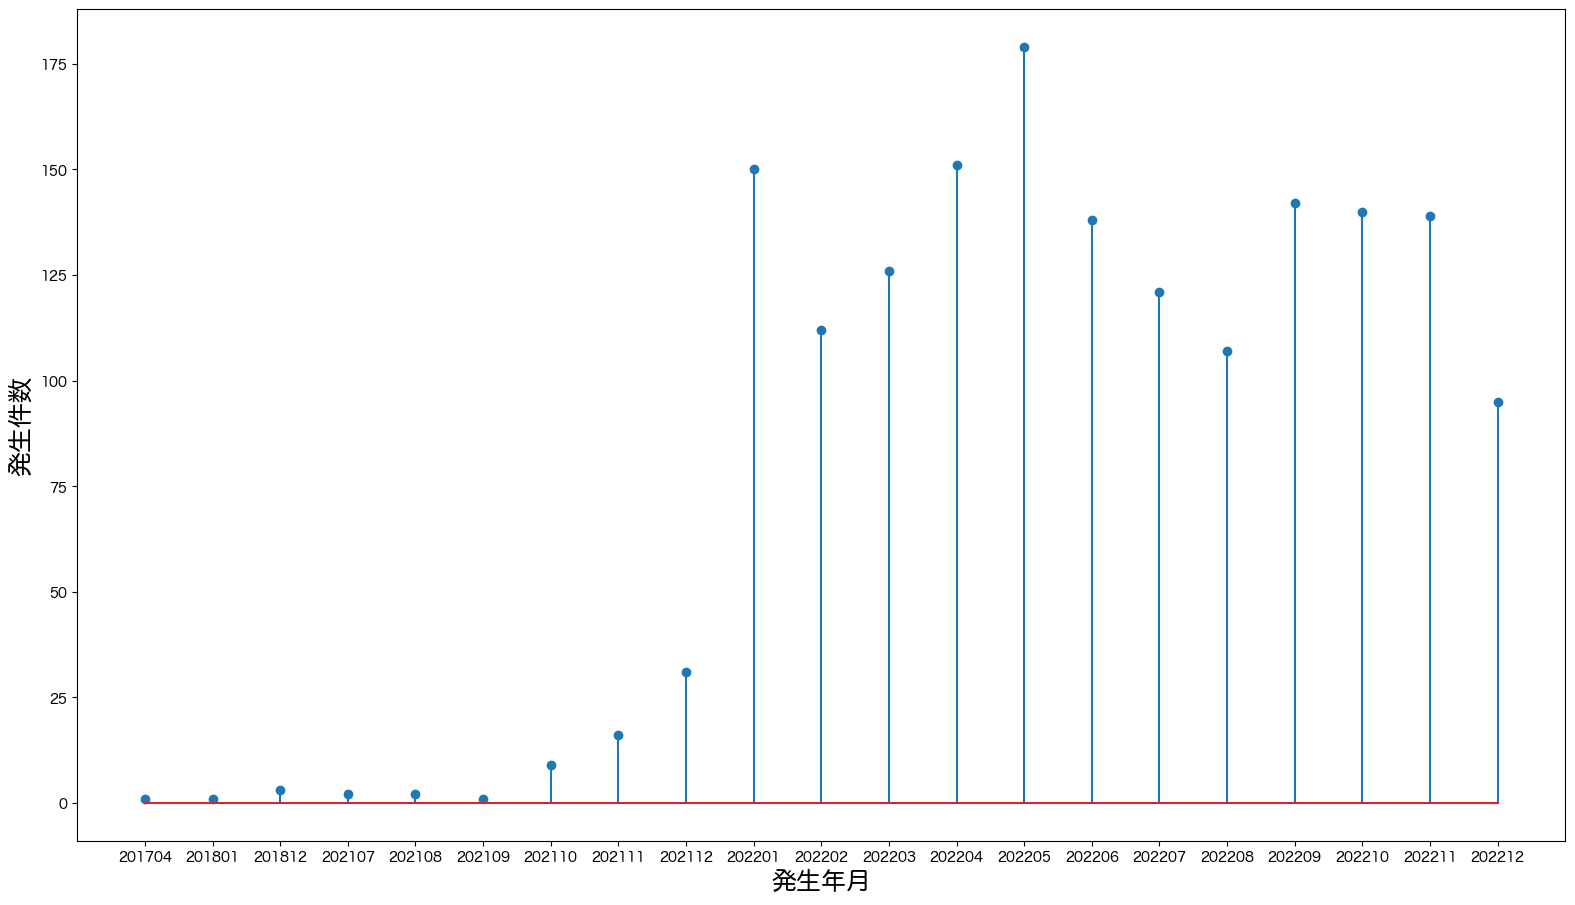

In [12]:
#コレログラム
%matplotlib inline

plt.xlabel("発生年月",fontsize=18)
plt.ylabel("発生件数",fontsize=18)
plt.stem(np.sort(df1["発生年月"].unique()),df_month)

In [13]:
df1.groupby("発生時（始期）").count()[["都道府県（発生地）"]]

,都道府県（発生地）
発生時（始期）,
0,33
1,17
10,92
11,89
12,85
13,123
14,108
15,101
16,119


In [14]:
#発生時「不明」を削除
df2=df1.drop(index=df1[df1["発生時（始期）"]=="不明"].index)
df2

,罪名,手口,管轄警察署（発生地）,管轄交番・駐在所（発生地）,都道府県（発生地）,市区町村（発生地）,発生年月日（始期）,発生時（始期）,発生場所,発生場所の詳細,施錠関係,現金被害の有無,発生年月
0,窃盗,車上ねらい,中央,八重洲通交番,東京都,中央区,2022-07-09,11,道路上,その他,施錠せず,あり,202207
1,窃盗,車上ねらい,中央,八重洲通交番,東京都,中央区,2022-04-03,11,道路上,その他,施錠せず,あり,202204
2,窃盗,車上ねらい,中央,八重洲通交番,東京都,中央区,2022-04-03,13,駐車（輪）場,駐車（輪）場,施錠せず,なし,202204
3,窃盗,車上ねらい,中央,八重洲通交番,東京都,中央区,2022-10-18,22,道路上,その他,施錠せず,あり,202210
4,窃盗,車上ねらい,中央,日本橋交番,東京都,中央区,2022-01-03,14,道路上,その他,施錠せず,なし,202201
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,窃盗,車上ねらい,小平,小川駅前交番,東京都,小平市,2022-01-29,17,その他,駐車（輪）場,施錠せず,なし,202201
1664,窃盗,車上ねらい,小平,花小金井駅前交番,東京都,小平市,2022-01-23,18,一戸建住宅,その他,施錠せず,なし,202201
1665,窃盗,車上ねらい,小平,花小金井駅前交番,東京都,小平市,2022-09-15,9,その他,駐車（輪）場,施錠せず,なし,202209
1666,窃盗,車上ねらい,小平,花小金井駅前交番,東京都,小平市,2022-01-21,11,その他,駐車（輪）場,施錠せず,あり,202201


In [15]:
#発生時（始期）の列のデータを整数型(int)に変換
df2["発生時（始期）"]=df2["発生時（始期）"].astype(int)
df2

,罪名,手口,管轄警察署（発生地）,管轄交番・駐在所（発生地）,都道府県（発生地）,市区町村（発生地）,発生年月日（始期）,発生時（始期）,発生場所,発生場所の詳細,施錠関係,現金被害の有無,発生年月
0,窃盗,車上ねらい,中央,八重洲通交番,東京都,中央区,2022-07-09,11,道路上,その他,施錠せず,あり,202207
1,窃盗,車上ねらい,中央,八重洲通交番,東京都,中央区,2022-04-03,11,道路上,その他,施錠せず,あり,202204
2,窃盗,車上ねらい,中央,八重洲通交番,東京都,中央区,2022-04-03,13,駐車（輪）場,駐車（輪）場,施錠せず,なし,202204
3,窃盗,車上ねらい,中央,八重洲通交番,東京都,中央区,2022-10-18,22,道路上,その他,施錠せず,あり,202210
4,窃盗,車上ねらい,中央,日本橋交番,東京都,中央区,2022-01-03,14,道路上,その他,施錠せず,なし,202201
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,窃盗,車上ねらい,小平,小川駅前交番,東京都,小平市,2022-01-29,17,その他,駐車（輪）場,施錠せず,なし,202201
1664,窃盗,車上ねらい,小平,花小金井駅前交番,東京都,小平市,2022-01-23,18,一戸建住宅,その他,施錠せず,なし,202201
1665,窃盗,車上ねらい,小平,花小金井駅前交番,東京都,小平市,2022-09-15,9,その他,駐車（輪）場,施錠せず,なし,202209
1666,窃盗,車上ねらい,小平,花小金井駅前交番,東京都,小平市,2022-01-21,11,その他,駐車（輪）場,施錠せず,あり,202201


In [16]:
#施錠したかどうか
df2.groupby(["施錠関係"]).count()[["発生年月日（始期）"]]

,発生年月日（始期）
施錠関係,
施錠した,225
施錠せず,1418


In [17]:
#ロジスティック回帰(施錠関係の有無)
from sklearn.linear_model import LogisticRegression

logistic_x=np.array([df2["発生時（始期）"]]).reshape(-1, 1)
logistic_ylock=df2["施錠関係"].map({"施錠した":0,"施錠せず":1})
logistic_regression=LogisticRegression()
logistic_lock=logistic_regression.fit(logistic_x,logistic_ylock)

In [18]:
#性能評価
from sklearn.metrics import log_loss

lock_proba=logistic_lock.predict_proba(logistic_x)
score=log_loss(logistic_ylock,lock_proba)
print(lock_proba)
print(f'logloss:{score:.4f}')

[[0.10166683 0.89833317]
 [0.10166683 0.89833317]
 [0.11778139 0.88221861]
 ...
 [0.08753827 0.91246173]
 [0.10166683 0.89833317]
 [0.17976817 0.82023183]]
logloss:0.3899


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       225
           1       0.86      1.00      0.93      1418

    accuracy                           0.86      1643
   macro avg       0.43      0.50      0.46      1643
weighted avg       0.74      0.86      0.80      1643



/Users/isonotakashimakoto/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/isonotakashimakoto/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/isonotakashimakoto/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

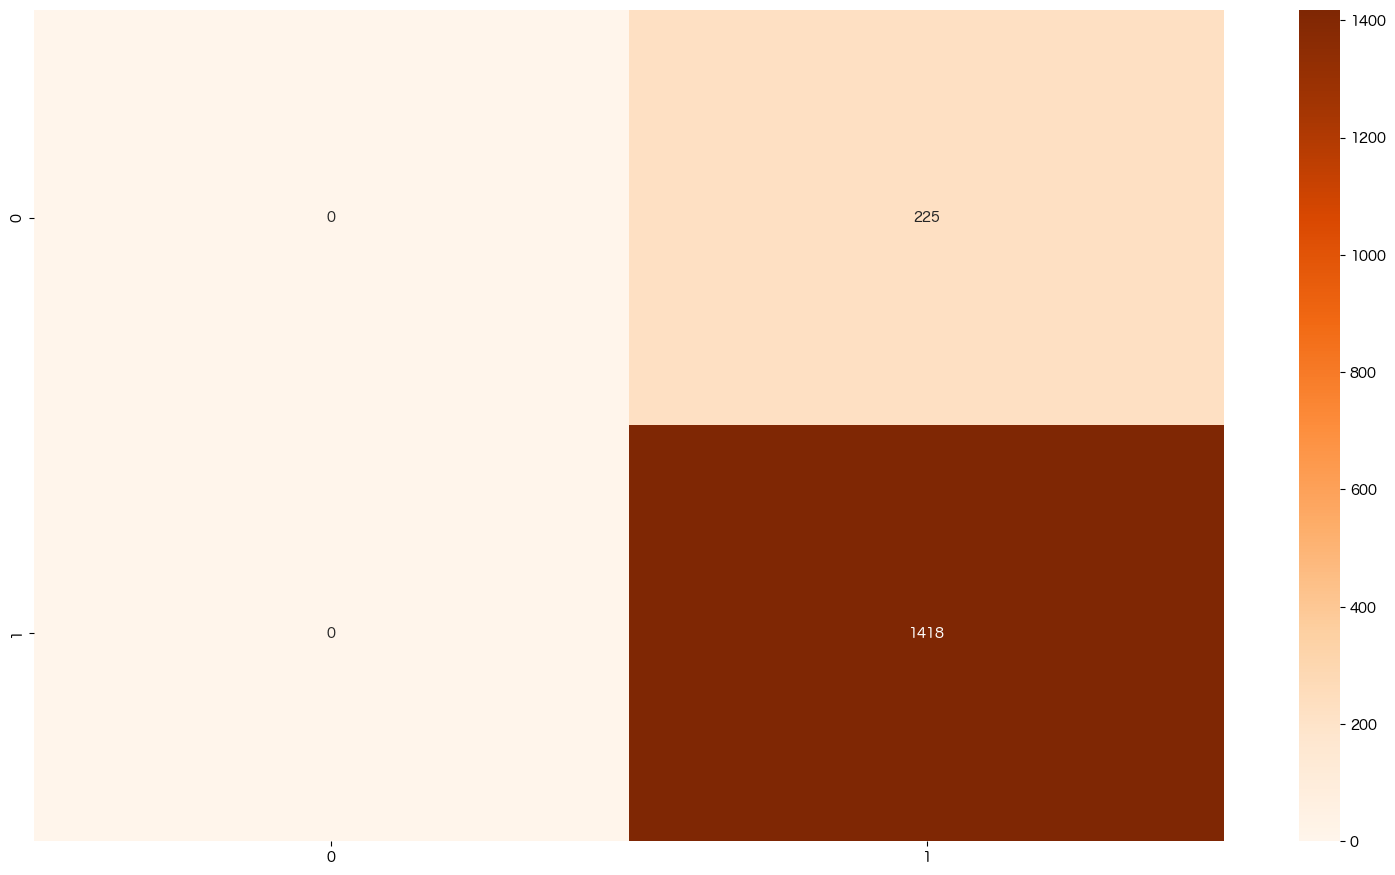

In [19]:
#混同行列
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report

lock_pred=logistic_lock.predict(logistic_x)
lock_cm=confusion_matrix(logistic_ylock,lock_pred)
sns.heatmap(lock_cm,annot=True,cmap='Oranges',fmt='d')
print(classification_report(logistic_ylock,lock_pred))

In [20]:
df2.groupby(["現金被害の有無"]).count()[["発生年月日（始期）"]]

,発生年月日（始期）
現金被害の有無,
あり,743
なし,900


In [21]:
#ロジスティック回帰(現金被害のの有無)
logistic_ymoney=df2["現金被害の有無"].map({"あり":0,"なし":1})
logistic_money=logistic_regression.fit(logistic_x,logistic_ymoney)

In [22]:
#性能評価
from sklearn.metrics import log_loss

money_proba=logistic_money.predict_proba(logistic_x)
score=log_loss(logistic_ymoney,money_proba)
print(money_proba)
print(f'logloss:{score:.4f}')

[[0.47347682 0.52652318]
 [0.47347682 0.52652318]
 [0.46046633 0.53953367]
 ...
 [0.48652342 0.51347658]
 [0.47347682 0.52652318]
 [0.42182535 0.57817465]]
logloss:0.6862


              precision    recall  f1-score   support

           0       0.48      0.08      0.13       743
           1       0.55      0.93      0.69       900

    accuracy                           0.54      1643
   macro avg       0.51      0.50      0.41      1643
weighted avg       0.52      0.54      0.44      1643



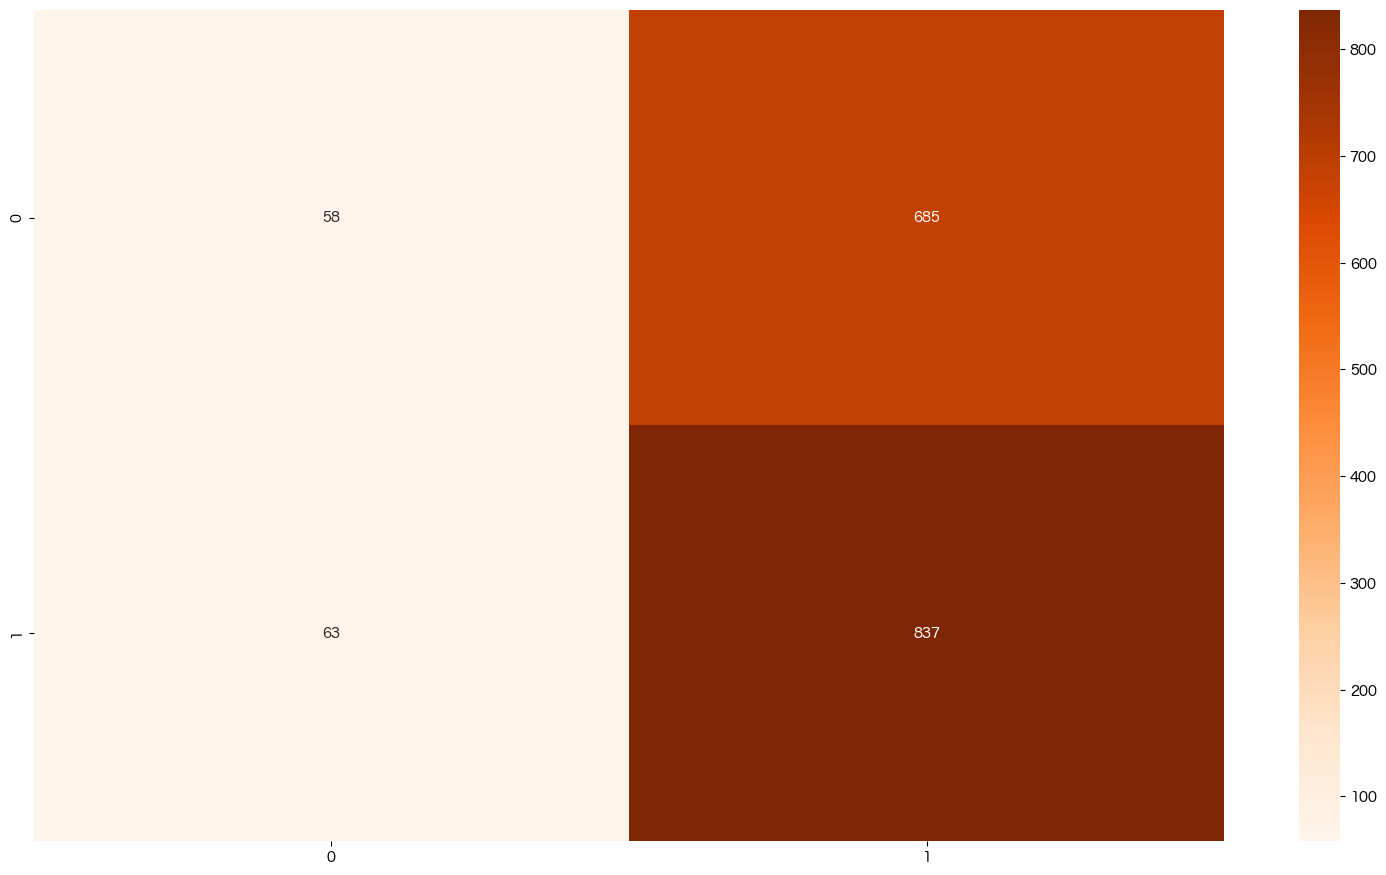

In [23]:
#混同行列
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report

money_pred=logistic_money.predict(logistic_x)
money_cm=confusion_matrix(logistic_ymoney,money_pred)
sns.heatmap(money_cm,annot=True,cmap='Oranges',fmt='d')
print(classification_report(logistic_ymoney,money_pred))

In [24]:
#発生場所
df_place=df1.groupby("発生場所").count()[["発生年月日（始期）"]]
df_place

,発生年月日（始期）
発生場所,
その他,497
その他の住宅（３階建て以下共同住宅等）,84
一戸建住宅,135
道路上,518
駐車（輪）場,285
４階建て以上共同住宅,147


次に人口と犯罪発生件数について予測モデルを立ててみようと思う。

In [25]:
population=pd.read_csv("jy22qv0100.csv")
population.head()

,地域階層,地域コード,地域,令和4年1月1日現在／世帯数(世帯),令和4年1月1日現在／人口／総数(人),令和4年1月1日現在／人口／男(人),令和4年1月1日現在／人口／女(人),人口密度1km2につき（令和4年）(人/km2),令和3年1月1日現在／世帯数(世帯),令和3年1月1日現在／人口／総数(人),令和3年1月1日現在／人口／男(人),令和3年1月1日現在／人口／女(人),差引増減人口（人口総数）(人),増減率 (人口総数)(%)
0,0,13000.0,総数,7354402.0,13794933.0,6775557.0,7019376.0,6287.0,7341487.0,13843525.0,6805319.0,7038206.0,-48592.0,-0.35
1,1,13100.0,区部,5254558.0,9522872.0,4669453.0,4853419.0,15175.0,5258484.0,9572763.0,4698055.0,4874708.0,-49891.0,-0.52
2,4,13101.0,千代田区,37773.0,67049.0,33485.0,33564.0,5750.0,37787.0,67216.0,33698.0,33518.0,-167.0,-0.25
3,4,13102.0,中央区,96535.0,171419.0,81477.0,89942.0,16789.0,95812.0,170583.0,81287.0,89296.0,836.0,0.49
4,4,13103.0,港区,145951.0,257183.0,120947.0,136236.0,12626.0,146527.0,259036.0,122111.0,136925.0,-1853.0,-0.72


In [26]:
population.isnull().sum()
population_null=population[population.isnull().any(axis=1)]
population_null

,地域階層,地域コード,地域,令和4年1月1日現在／世帯数(世帯),令和4年1月1日現在／人口／総数(人),令和4年1月1日現在／人口／男(人),令和4年1月1日現在／人口／女(人),人口密度1km2につき（令和4年）(人/km2),令和3年1月1日現在／世帯数(世帯),令和3年1月1日現在／人口／総数(人),令和3年1月1日現在／人口／男(人),令和3年1月1日現在／人口／女(人),差引増減人口（人口総数）(人),増減率 (人口総数)(%)
72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,住民基本台帳による東京都の世帯と人口 令和4年1月,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,第１表 区市町村、世帯数、男女別人口（人口総数）及び人口密度（令和4、3年）,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,注）「世帯数」は、日本人のみの世帯、外国人のみの世帯及び日本人と外国人の複数国籍世帯を合わせ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,地域階層（0:総数 1:区部・市部・町村部 2:郡部・島部 3:大島支庁・三宅支庁・八丈支庁...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
#欠損値削除
population=population.dropna()
population=population.drop(population.index[[0,1]])
#空白削除
population["地域"]=population["地域"].str.strip()
population

,地域階層,地域コード,地域,令和4年1月1日現在／世帯数(世帯),令和4年1月1日現在／人口／総数(人),令和4年1月1日現在／人口／男(人),令和4年1月1日現在／人口／女(人),人口密度1km2につき（令和4年）(人/km2),令和3年1月1日現在／世帯数(世帯),令和3年1月1日現在／人口／総数(人),令和3年1月1日現在／人口／男(人),令和3年1月1日現在／人口／女(人),差引増減人口（人口総数）(人),増減率 (人口総数)(%)
2,4,13101.0,千代田区,37773.0,67049.0,33485.0,33564.0,5750.0,37787.0,67216.0,33698.0,33518.0,-167.0,-0.25
3,4,13102.0,中央区,96535.0,171419.0,81477.0,89942.0,16789.0,95812.0,170583.0,81287.0,89296.0,836.0,0.49
4,4,13103.0,港区,145951.0,257183.0,120947.0,136236.0,12626.0,146527.0,259036.0,122111.0,136925.0,-1853.0,-0.72
5,4,13104.0,新宿区,216903.0,341222.0,170950.0,170272.0,18728.0,219464.0,345231.0,173164.0,172067.0,-4009.0,-1.16
6,4,13105.0,文京区,123199.0,226332.0,107576.0,118756.0,20047.0,123472.0,226574.0,107703.0,118871.0,-242.0,-0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,3,13400.0,八丈支庁,4347.0,7298.0,3656.0,3642.0,88.0,4368.0,7389.0,3713.0,3676.0,-91.0,-1.23
68,4,13401.0,八丈町,4228.0,7128.0,3558.0,3570.0,99.0,4258.0,7224.0,3618.0,3606.0,-96.0,-1.33
69,4,13402.0,青ヶ島村,119.0,170.0,98.0,72.0,29.0,110.0,165.0,95.0,70.0,5.0,3.03
70,3,13420.0,小笠原支庁,1499.0,2575.0,1441.0,1134.0,24.0,1500.0,2606.0,1452.0,1154.0,-31.0,-1.19


In [28]:
population_num=population[["地域","令和4年1月1日現在／人口／総数(人)",]]
population_num.head()

,地域,令和4年1月1日現在／人口／総数(人)
2,千代田区,67049.0
3,中央区,171419.0
4,港区,257183.0
5,新宿区,341222.0
6,文京区,226332.0


In [29]:
#データ統合
df_new=df_bar.reset_index()
df_new=df_new.rename(columns={'市区町村（発生地）': '地域'})
df_pop=pd.merge(df_new,population_num,on='地域',how='left')
df_pop.head()

,地域,都道府県（発生地）,令和4年1月1日現在／人口／総数(人)
0,大田区,153,728703.0
1,江戸川区,143,689739.0
2,板橋区,94,567214.0
3,足立区,90,689106.0
4,世田谷区,68,916208.0


In [30]:
df_pop.isnull().sum()

地域                     0
都道府県（発生地）              0
令和4年1月1日現在／人口／総数(人)    0
dtype: int64

In [31]:
#正規化
from sklearn.preprocessing import MinMaxScaler

mm=MinMaxScaler()
df_mm=mm.fit_transform(df_pop[["都道府県（発生地）","令和4年1月1日現在／人口／総数(人)"]])

In [32]:
#標準化
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
df_sc=sc.fit_transform(df_mm)
df_sc=pd.DataFrame(df_mm)
df_sc.head()

,0,1
0,1.000000,0.794247
1,0.933775,0.751491
2,0.609272,0.617042
3,0.582781,0.750796
4,0.437086,1.000000


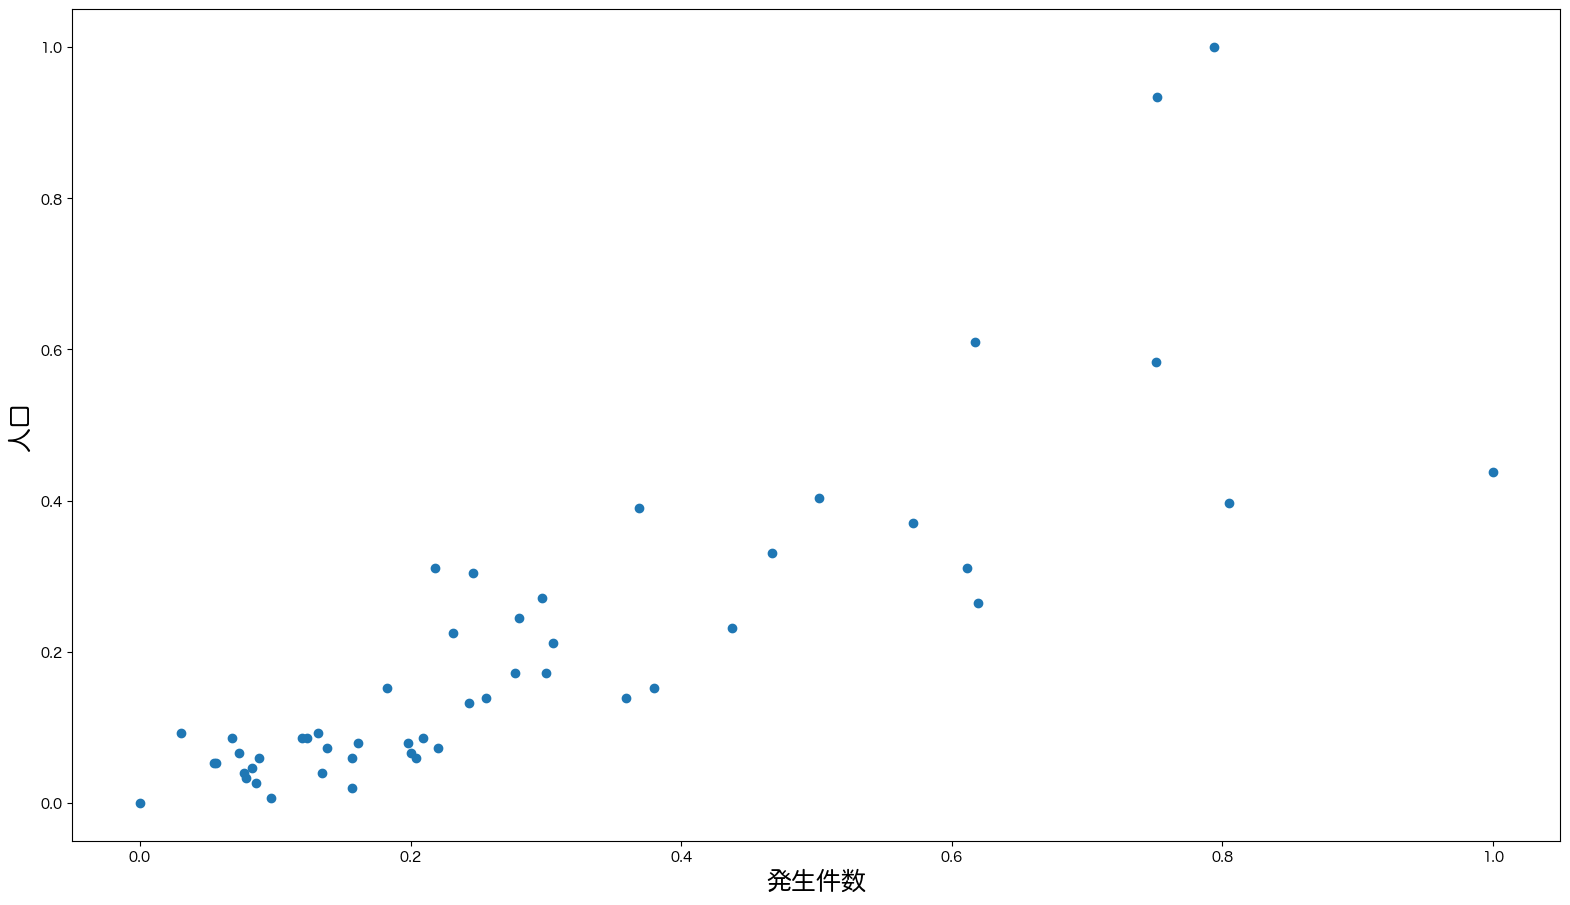

In [33]:
#散布図
%matplotlib inline
plt.scatter(df_sc[1],df_sc[0])
plt.xlabel("発生件数",fontsize=18)
plt.ylabel("人口",fontsize=18)
plt.show()

In [34]:
#線形単回帰
from sklearn.linear_model import LinearRegression

linear_regression=LinearRegression()
x=np.array(df_sc[0]).reshape(-1, 1)
y=np.array(df_sc[1]).reshape(-1, 1)
linear_reg=linear_regression.fit(x,y)
print("回帰係数：",linear_reg.coef_,"切片：",linear_reg.intercept_)
linear_pred=linear_reg.predict(x)
print("決定係数：",linear_regression.score(x, y))

回帰係数： [[0.9253905]] 切片： [0.10257247]
決定係数： 0.6977527984975718


当てはまりは約70%

In [35]:
#多項式回帰
from sklearn.preprocessing import PolynomialFeatures

#バイアス削除
quadratic=PolynomialFeatures(degree=2,include_bias=False)
x_quad=quadratic.fit_transform(x)
poly_reg=linear_regression.fit(x_quad,y)
print("回帰係数：",poly_reg.coef_,"切片：",poly_reg.intercept_)
poly_pred=poly_reg.predict(x_quad)
print("決定係数：",linear_regression.score(x_quad, y))

回帰係数： [[ 1.74628691 -0.9856256 ]] 切片： [0.02087497]
決定係数： 0.779521719607813


当てはまりは約78%

In [36]:
#リッジ回帰
from sklearn.linear_model import Ridge

ridge_regression=Ridge(alpha=0.1)
ridge_reg=ridge_regression.fit(x_quad,y)
print("回帰係数：",ridge_reg.coef_,"切片：",ridge_reg.intercept_)
ridge_pred=ridge_reg.predict(x_quad)
print("決定係数：",ridge_regression.score(x_quad, y))

回帰係数： [[ 1.20291109 -0.39612496]] 切片： [0.08037989]
決定係数： 0.7480340539398901


In [37]:
#線形サポートベクター回帰
from sklearn.svm import SVR

svr=SVR(kernel='linear')
svr_reg=svr.fit(x,y.ravel())
print("回帰係数：",svr_reg.coef_,"切片：",svr_reg.intercept_)
svr_pred=svr_reg.predict(x)
print("決定係数：",svr.score(x, y))

回帰係数： [[0.78150909]] 切片： [0.12173745]
決定係数： 0.6790544390952213


In [38]:
#多項式サポートベクター回帰

svr_poly=SVR(kernel='poly')
svr_polyreg=svr_poly.fit(x,y.ravel())
svr_poly_pred=svr_polyreg.predict(x)
print("決定係数：",svr_poly.score(x, y))

決定係数： 0.28471881858136117


In [39]:
#ガウスカーネルサポートベクター回帰

svr_rbf=SVR(kernel='rbf')
svr_rbfreg=svr_rbf.fit(x,y.ravel())
svr_rbf_pred=svr_rbfreg.predict(x)
print("決定係数：",svr_rbf.score(x, y))

決定係数： 0.8025222298695917


In [40]:
#決定木回帰
from sklearn.tree import DecisionTreeRegressor

tree_regression=DecisionTreeRegressor(max_depth=3)
tree_reg=tree_regression.fit(x, y)
tree_pred=tree_reg.predict(x)
print("決定係数：",tree_regression.score(x, y))

決定係数： 0.8583849075300941


In [41]:
#ランダムフォレスト回帰
from sklearn.ensemble import RandomForestRegressor

rf_regression=RandomForestRegressor()
rf_reg=rf_regression.fit(x,y.ravel())
rf_pred=rf_reg.predict(x)
print("決定係数：",rf_regression.score(x, y))

決定係数： 0.9100387040691227


In [42]:
#ポアソン回帰
from sklearn.linear_model import PoissonRegressor

poisson_regression=PoissonRegressor()
poisson_reg=poisson_regression.fit(x,y.ravel())
print("回帰係数：",poisson_reg.coef_,"切片：",poisson_reg.intercept_)
poisson_pred=poisson_reg.predict(x)

回帰係数： [0.04111204] 切片： -1.2444787247521194


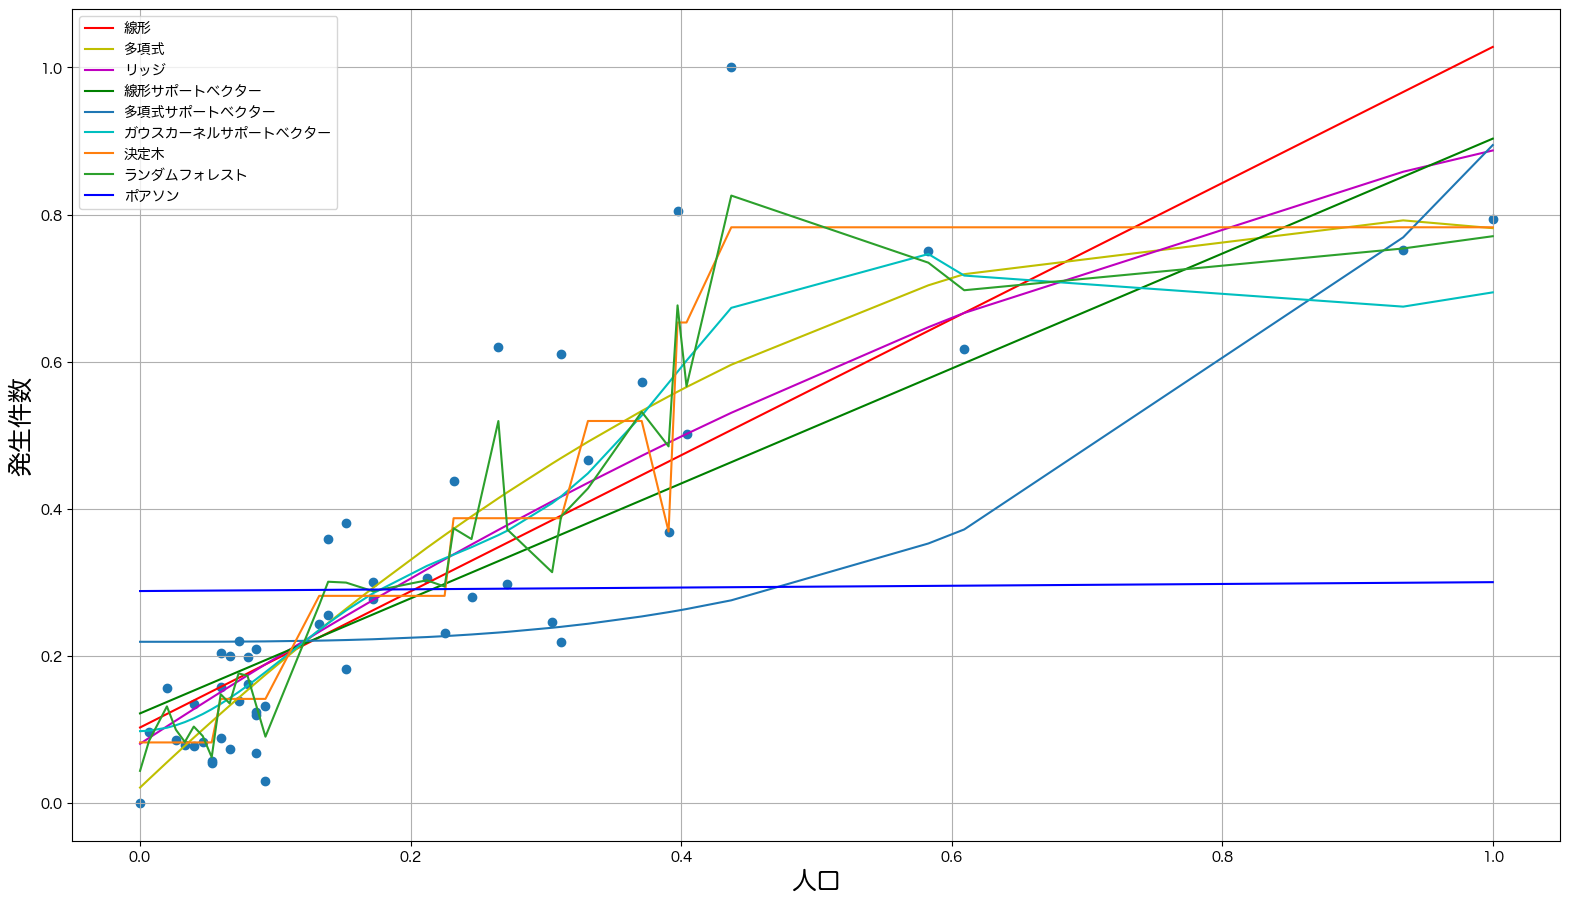

In [43]:
%matplotlib inline
plt.scatter(x,y)
plt.xlabel("発生件数",fontsize=18)
plt.ylabel("人口",fontsize=18)
plt.plot(x,linear_pred,c="r",label="線形")
plt.plot(x,poly_pred,c="y",label="多項式")
plt.plot(x,ridge_pred,c="m",label="リッジ")
plt.plot(x,svr_pred,c="g",label="線形サポートベクター")
plt.plot(x,svr_poly_pred,label="多項式サポートベクター")
plt.plot(x,svr_rbf_pred,c="c",label="ガウスカーネルサポートベクター")
plt.plot(x,tree_pred,label="決定木")
plt.plot(x,rf_pred,label="ランダムフォレスト")
plt.plot(x,poisson_pred,c="b",label="ポアソン")
plt.xlabel("人口",fontsize=18)
plt.ylabel("発生件数",fontsize=18)
plt.grid()
plt.legend()
plt.show()

In [73]:
#各モデルの性能評価
from sklearn.metrics import mean_squared_error
#MSE(平均二乗誤差)
print('線形回帰　MSE: % 4f' %mean_squared_error(y,linear_pred))
print('多項式回帰　MSE: % 4f' %mean_squared_error(y,poly_pred))
#RMSE(平均二乗平方根誤差)
print('線形回帰　RMSE: % 4f' %(np.sqrt(mean_squared_error(y,linear_pred))))
print('多項式回帰　RMSE: % 4f' %(np.sqrt(mean_squared_error(y,poly_pred))))

線形回帰　MSE:  0.016697
多項式回帰　MSE:  0.012180
線形回帰　RMSE:  0.129218
多項式回帰　RMSE:  0.110364


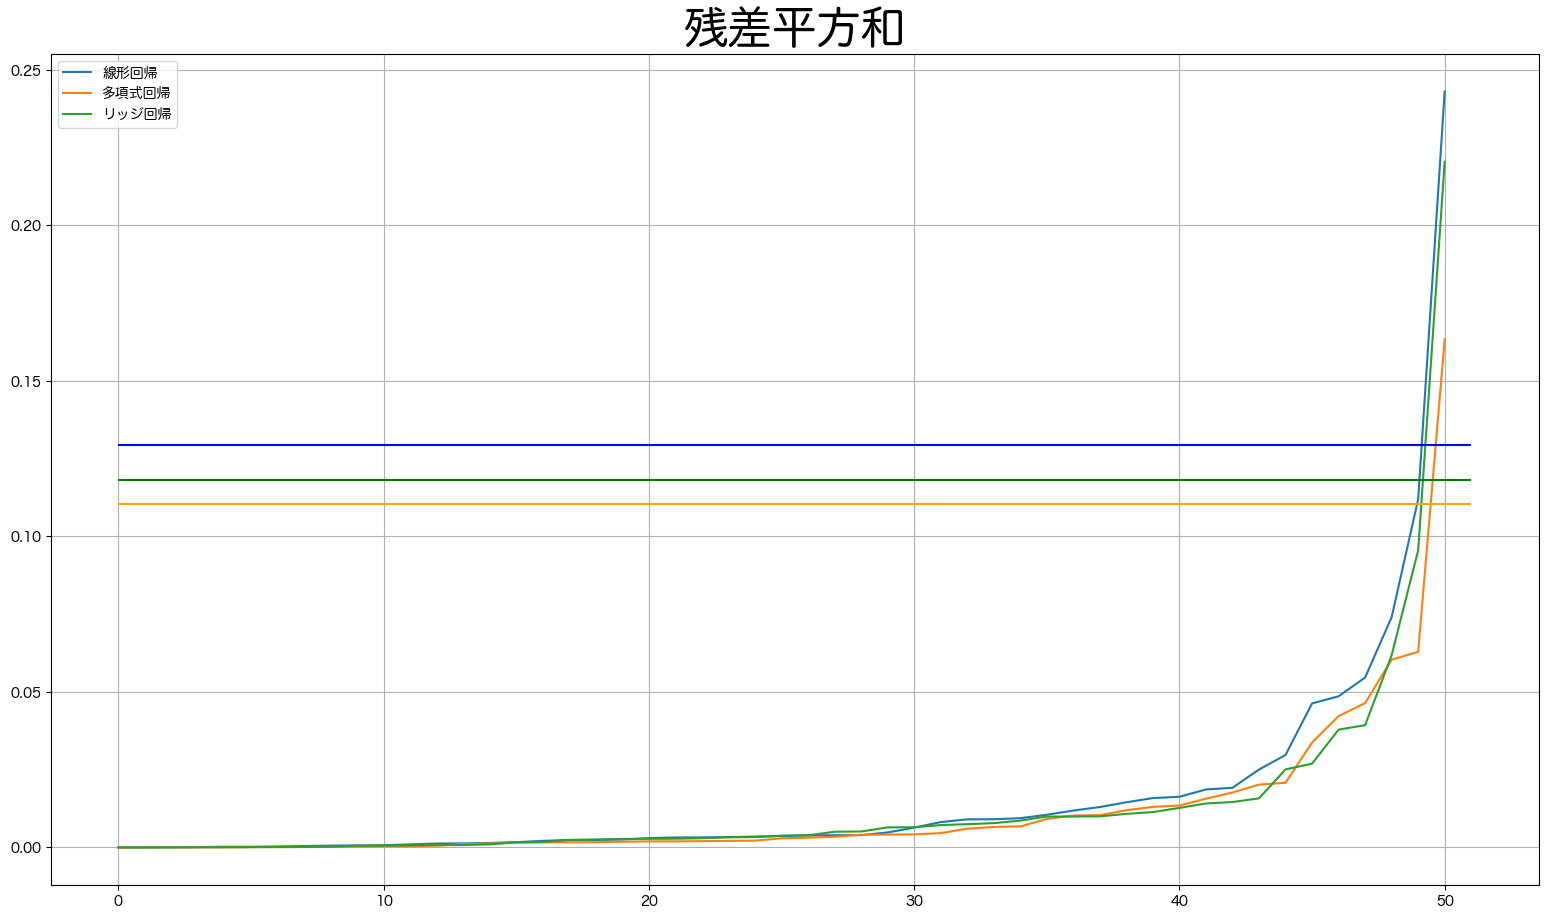

In [120]:
#残差平方和プロット
linear_e=(y-linear_pred)**2
poly_e=(y-poly_pred)**2
ridge_e=(y-ridge_pred)**2
plt.plot(np.sort((linear_e).ravel()),label="線形回帰")
plt.plot(np.sort((poly_e).ravel()),label="多項式回帰")
plt.plot(np.sort((ridge_e).ravel()),label="リッジ回帰")
plt.hlines(y=np.sqrt(mean_squared_error(y,linear_pred)),xmin=0,xmax=51,color="blue")
plt.hlines(y=np.sqrt(mean_squared_error(y,poly_pred)),xmin=0,xmax=51,color="orange")
plt.hlines(y=np.sqrt(mean_squared_error(y,ridge_pred)),xmin=0,xmax=51,color="green")
plt.title("残差平方和",fontsize=32)
plt.grid()
plt.legend()
plt.show()

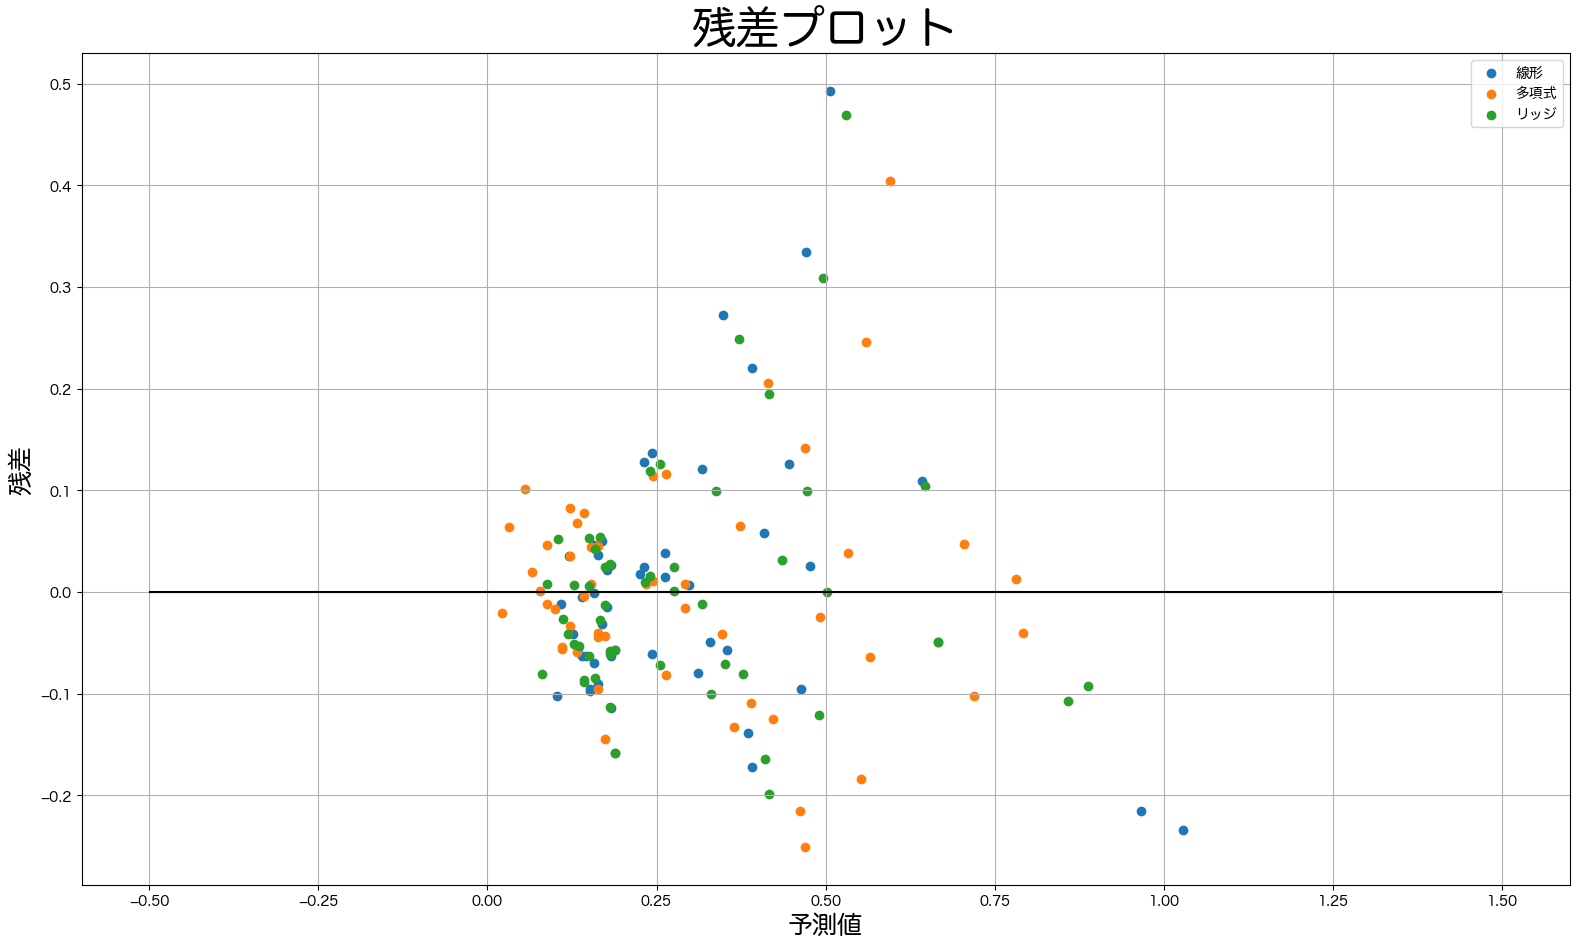

In [67]:
#残差プロット(線形回帰、多項式、リッジ)
plt.scatter(linear_pred,y-linear_pred,label="線形")
plt.scatter(poly_pred,y-poly_pred,label="多項式")
plt.scatter(ridge_pred,y-ridge_pred,label="リッジ")
plt.title("残差プロット",fontsize=32)
plt.xlabel("予測値",fontsize=18)
plt.ylabel("残差",fontsize=18)
plt.hlines(y=0,xmin=-0.5,xmax=1.5,color="black")
plt.grid()
plt.legend()
plt.show()